In [1]:
import requests
import urllib.parse
import pandas as pd

In [2]:
def create_playlist(name,public):
    response = requests.post(
        SPOTIFY_CREATE_PLAYLIST_URL,
        headers = {
            "Authorization": f"Bearer {ACCESS_TOKEN}"
        },
        json = {
            "name": name,
            "public": public
        }
    )
    json_resp = response.json()
    
    return json_resp

In [12]:
def get_playlist():
    SPOTIFY_GET_PLAYLIST_URL = "https://api.spotify.com/v1/playlists/37i9dQZF1EMbaHuRPs7mTk" 
    ACCESS_TOKEN = "BQBgpVB_O2EfwpOF9pJFU0JRiTRnpsPRyHTFNm_k2nxblY0VQWXXYaI-MiRfAkOoBgCO5o6XJD2ik8hmI28kx6sW0-iIyhtGLLrtcN7uKYCZFtEEahBVdRgg-EepXUGSeJ-TPbng9kwper5J_uqvXiD9GWeqJoPcslwro3kJ4NIHQev9Yzalf-M8wTNUl4LSwdFYiXtCTl-X_SfZcwgITR-A7MCbnDSSjC3PCgcE7h0rqIJqgIRRYSrv"
    response = requests.get(
        SPOTIFY_GET_PLAYLIST_URL,
        headers = {
            "Accept": "application/json",
            "Content-Type": "application/json",
            "Authorization": f"Bearer {ACCESS_TOKEN}"
        }        
    )
    json_resp = response.json()
    
    return json_resp

In [8]:
def get_playlist_list():
    SPOTIFY_GET_PLAYLIST_URL = "https://api.spotify.com/v1/me/playlists" 
    ACCESS_TOKEN = "BQBgpVB_O2EfwpOF9pJFU0JRiTRnpsPRyHTFNm_k2nxblY0VQWXXYaI-MiRfAkOoBgCO5o6XJD2ik8hmI28kx6sW0-iIyhtGLLrtcN7uKYCZFtEEahBVdRgg-EepXUGSeJ-TPbng9kwper5J_uqvXiD9GWeqJoPcslwro3kJ4NIHQev9Yzalf-M8wTNUl4LSwdFYiXtCTl-X_SfZcwgITR-A7MCbnDSSjC3PCgcE7h0rqIJqgIRRYSrv"
    response = requests.get(
        SPOTIFY_GET_PLAYLIST_URL,
        headers = {
            "Accept": "application/json",
            "Content-Type": "application/json",
            "Authorization": f"Bearer {ACCESS_TOKEN}"
        }        
    )
    json_resp = response.json()
    
    return json_resp

In [ ]:
playlist = create_playlist(
        name = "My Suggestions List",
        public = False
    )
print(f"Playlist: {playlist}")

In [9]:
lists = get_playlist_list()
print(f"Playlist: {lists}")

Playlist: {'href': 'https://api.spotify.com/v1/users/11121032236/playlists?offset=0&limit=20', 'items': [{'collaborative': False, 'description': 'Melt your ears to some smooth lo-fi hip hop / chill hop, lofi jazz hiphop chill beat 🥞 <a href="https://ko-fi.com/etymologyrecords">Submit your track here,</a> 🎧  <a href="https://www.youtube.com/watch?v=plxl3KqmWBE">Stream live here</a>', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/2Qp7Gl62EJEBfh5LTJRSpl'}, 'href': 'https://api.spotify.com/v1/playlists/2Qp7Gl62EJEBfh5LTJRSpl', 'id': '2Qp7Gl62EJEBfh5LTJRSpl', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706c0000bebb9d4730ad8a342c8d0eaa91fe', 'width': None}], 'name': 'Lo-fi Butter 🧈 |  Lofi beats to butter your study & relaxation', 'owner': {'display_name': 'Etymology Records', 'external_urls': {'spotify': 'https://open.spotify.com/user/eddielim112'}, 'href': 'https://api.spotify.com/v1/users/eddielim112', 'id': 'eddielim112', 'type': 'user', 'uri': 'spot

In [10]:
for i in range(0,len(lists)):
    print(lists["items"][i]["name"])

Lo-fi Butter 🧈 |  Lofi beats to butter your study & relaxation
Rock This Presents...Best Rock Songs of 2020

Your Top Songs 2020
Workout - Rock
Lo-Fi Beats
00s Rock Anthems


In [42]:
print(lists["items"][3]["name"])

Your Top Songs 2020


In [43]:
print(lists["items"][3]["id"])

37i9dQZF1EMbaHuRPs7mTk


In [13]:
songs_list = get_playlist()
print(f"Playlist: {songs_list}")

Playlist: {'collaborative': False, 'description': 'The songs you loved most this year, all wrapped up.', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1EMbaHuRPs7mTk'}, 'followers': {'href': None, 'total': 1}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1EMbaHuRPs7mTk', 'id': '37i9dQZF1EMbaHuRPs7mTk', 'images': [{'height': None, 'url': 'https://lineup-images.scdn.co/wrapped-2020-top100_LARGE-en.jpg', 'width': None}], 'name': 'Your Top Songs 2020', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': False, 'snapshot_id': 'MjY3NzQ1NzksMDAwMDAwMDBhZDQ0OWI2Y2ViNTBiZDliNDE1MGRlYWMyMDM2NWUyNw==', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1EMbaHuRPs7mTk/tracks?offset=0&limit=100', 'items': [{'added_at': '2020-11-27T10:59:52Z', 'adde

In [45]:
song_list_df = pd.DataFrame(columns = [["Artist","Artist_ID","Track","Track_ID"]])
list_art = []
list_art_id = []
list_name = []
list_id = []
for i in range(0,100):
    list_art.append(songs_list["tracks"]["items"][i]["track"]["artists"][0]["name"])
    list_art_id.append(songs_list["tracks"]["items"][i]["track"]["artists"][0]["id"])
    list_name.append(songs_list["tracks"]["items"][i]["track"]["name"])
    list_id.append(songs_list["tracks"]["items"][i]["track"]["id"])

In [47]:
song_list_df["Artist"] = list_art
song_list_df["Artist_ID"] = list_art_id
song_list_df["Track"] = list_name
song_list_df["Track_ID"] = list_id

In [48]:
song_list_df.head()

,Artist,Artist_ID,Track,Track_ID
0,KALEO,7jdFEYD2LTYjfwxOdlVjmc,I Can't Go on Without You,1OtGo99uypkRbMqshBVFnn
1,Hozier,2FXC3k01G6Gw61bmprjgqS,Arsonist's Lullabye,7lpmIGFw7Kc9qIdq4cGs34
2,Rag'n'Bone Man,4f9iBmdUOhQWeP7dcAn1pf,Disfigured,0YUSVg7dncF1TzZ3IFf6Zh
3,Stone Sour,49qiE8dj4JuNdpYGRPdKbF,Through Glass,2xKzHL1EwH4mBD4HbPIOge
4,Rammstein,6wWVKhxIU2cEi0K81v7HvP,Sonne,3gVhsZtseYtY1fMuyYq06F


In [52]:
def get_audio_feat(track_id):
    SPOTIFY_GET_FEATURES_URL = "https://api.spotify.com/v1/audio-features/"+track_id 
    ACCESS_TOKEN = "BQCjYMSlu10WlZd402Q1yXPaeJEYoz1ZbFaHvciUXDL096ulOU363v_jCJq5c5YCSg_JQ9wLHMCOGFJeMfskTklJCRRcNjQqgGi0mfiKtpxnXTcwGdavuz5Khh9W8H74prYpjEzFSYs1aoF-tiwzqE21EVsRIC_lLZelHAW8aKf6lYmZpfeq2krDM5kthxSCl0e9yDVxLhpnBuWu8bOWlXn33ixduwQ0_aZ23Ets2U8BhI5pajXjvShH"
    response = requests.get(
        SPOTIFY_GET_FEATURES_URL,
        headers = {
            "Accept": "application/json",
            "Content-Type": "application/json",
            "Authorization": f"Bearer {ACCESS_TOKEN}"
        }        
    )
    json_resp = response.json()
    
    return json_resp

In [53]:
feat = get_audio_feat("1OtGo99uypkRbMqshBVFnn")
print(f"Features: {feat}")

Features: {'danceability': 0.368, 'energy': 0.267, 'key': 8, 'loudness': -9.395, 'mode': 0, 'speechiness': 0.0428, 'acousticness': 0.655, 'instrumentalness': 2.24e-05, 'liveness': 0.0834, 'valence': 0.194, 'tempo': 91.88, 'type': 'audio_features', 'id': '1OtGo99uypkRbMqshBVFnn', 'uri': 'spotify:track:1OtGo99uypkRbMqshBVFnn', 'track_href': 'https://api.spotify.com/v1/tracks/1OtGo99uypkRbMqshBVFnn', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1OtGo99uypkRbMqshBVFnn', 'duration_ms': 377000, 'time_signature': 4}


In [54]:
feat["danceability"]

0.368

In [58]:
list_dance = []
list_energy = []
list_loud = []
list_speech = []
list_acoustic = []
list_instru = []
list_live = []
list_valence = []
list_tempo = []
for i in range(0,100):
    feat = get_audio_feat(str(song_list_df.loc[i]["Track_ID"]))
    list_dance.append(feat["danceability"])
    list_energy.append(feat["energy"])
    list_loud.append(feat["loudness"])
    list_speech.append(feat["speechiness"])
    list_acoustic.append(feat["acousticness"])
    list_instru.append(feat["instrumentalness"])
    list_live.append(feat["liveness"])
    list_valence.append(feat["valence"])
    list_tempo.append(feat["tempo"])
    

In [59]:
song_list_df["Danceability"] = list_dance
song_list_df["Energy"] = list_energy
song_list_df["Loudness"] = list_loud
song_list_df["Speechiness"] = list_speech
song_list_df["Acousticness"] = list_dance
song_list_df["Instrumentalness"] = list_energy
song_list_df["Liveness"] = list_loud
song_list_df["Valence"] = list_speech
song_list_df["Tempo"] = list_speech

In [60]:
song_list_df.head()

,Artist,Artist_ID,Track,Track_ID,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,KALEO,7jdFEYD2LTYjfwxOdlVjmc,I Can't Go on Without You,1OtGo99uypkRbMqshBVFnn,0.368,0.267,-9.395,0.0428,0.368,0.267,-9.395,0.0428,0.0428
1,Hozier,2FXC3k01G6Gw61bmprjgqS,Arsonist's Lullabye,7lpmIGFw7Kc9qIdq4cGs34,0.281,0.426,-9.070,0.0526,0.281,0.426,-9.070,0.0526,0.0526
2,Rag'n'Bone Man,4f9iBmdUOhQWeP7dcAn1pf,Disfigured,0YUSVg7dncF1TzZ3IFf6Zh,0.457,0.474,-5.380,0.0315,0.457,0.474,-5.380,0.0315,0.0315
3,Stone Sour,49qiE8dj4JuNdpYGRPdKbF,Through Glass,2xKzHL1EwH4mBD4HbPIOge,0.545,0.753,-4.618,0.0361,0.545,0.753,-4.618,0.0361,0.0361
4,Rammstein,6wWVKhxIU2cEi0K81v7HvP,Sonne,3gVhsZtseYtY1fMuyYq06F,0.510,0.917,-4.806,0.0854,0.510,0.917,-4.806,0.0854,0.0854


In [61]:
song_list_df.to_csv(r"2020_top_songs.csv")

In [101]:
import matplotlib as plt
from sklearn import preprocessing

In [63]:
song_list_df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.528970,0.683320,-6.581230,0.057978,0.528970,0.683320,-6.581230,0.057978,0.057978
std,0.155498,0.194017,2.777296,0.046279,0.155498,0.194017,2.777296,0.046279,0.046279
min,0.160000,0.163000,-16.565000,0.023200,0.160000,0.163000,-16.565000,0.023200,0.023200
25%,0.446750,0.547000,-7.643250,0.033100,0.446750,0.547000,-7.643250,0.033100,0.033100
50%,0.526500,0.724000,-5.835000,0.041900,0.526500,0.724000,-5.835000,0.041900,0.041900
75%,0.637500,0.833500,-4.792750,0.058900,0.637500,0.833500,-4.792750,0.058900,0.058900
max,0.949000,0.982000,-2.337000,0.277000,0.949000,0.982000,-2.337000,0.277000,0.277000


In [64]:
song_list_df.isnull().sum()

Artist              0
Artist_ID           0
Track               0
Track_ID            0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

<AxesSubplot:>

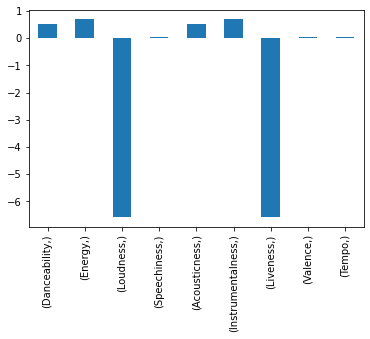

In [80]:
song_list_df.mean().plot(kind="bar")

In [77]:
song_list_df.mean()

Danceability        0.528970
Energy              0.683320
Loudness           -6.581230
Speechiness         0.057978
Acousticness        0.528970
Instrumentalness    0.683320
Liveness           -6.581230
Valence             0.057978
Tempo               0.057978
dtype: float64

<AxesSubplot:ylabel='Frequency'>

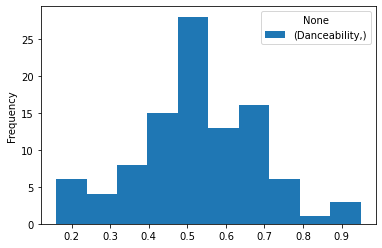

In [92]:
song_list_df["Danceability"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

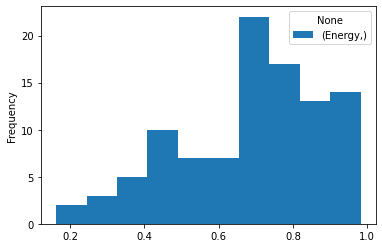

In [93]:
song_list_df["Energy"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

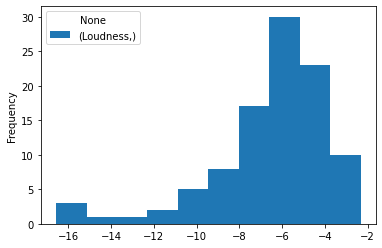

In [94]:
song_list_df["Loudness"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

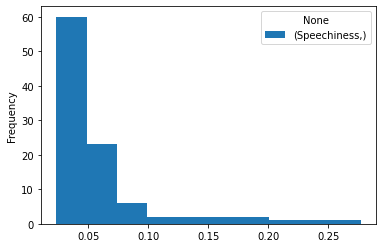

In [95]:
song_list_df["Speechiness"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

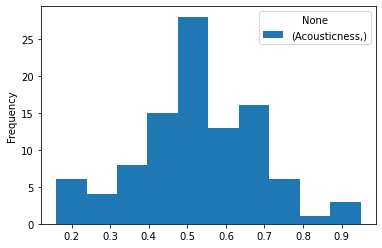

In [96]:
song_list_df["Acousticness"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

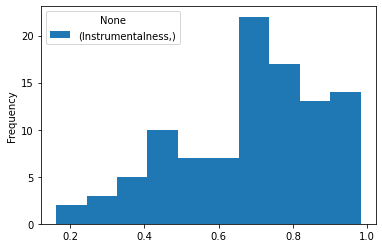

In [97]:
song_list_df["Instrumentalness"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

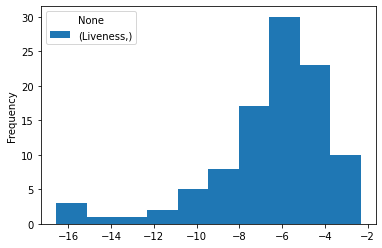

In [98]:
song_list_df["Liveness"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

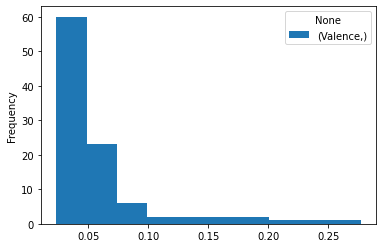

In [99]:
song_list_df["Valence"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

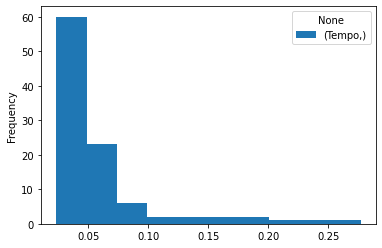

In [100]:
song_list_df["Tempo"].plot.hist()

<AxesSubplot:>

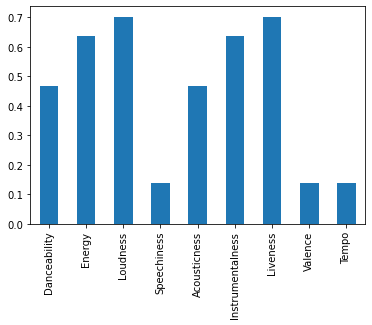

In [110]:
mm_scaler = preprocessing.MinMaxScaler()
mm_song_list_df = song_list_df[["Danceability","Energy","Loudness","Speechiness","Acousticness",
                                                       "Instrumentalness","Liveness","Valence","Tempo"]]
mm_song_list_df = mm_scaler.fit_transform(mm_song_list_df)
mm_song_list_df = pd.DataFrame(mm_song_list_df, columns=["Danceability","Energy","Loudness","Speechiness","Acousticness",
                                                       "Instrumentalness","Liveness","Valence","Tempo"])
mm_song_list_df.mean().plot.bar()